<a href="https://colab.research.google.com/github/Deca97/Covid_mortality_predictive_model/blob/main/Covid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dcurves

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=05fd4e9c43cc9359e58cced3f956781ee1335686b9ede1558b915fa1579feb37
  Stored in directory: /root/.cache/pip/wheels/9d/67/2f/53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=d9cd

#Data Exploration and Statistical Analysis

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
import statsmodels.api as sm
from dcurves import dca, plot_graphs
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import mannwhitneyu


# Load the dataset
df = pd.read_excel("/covidpredict-1.xlsx")

# Basic dataset exploration
print("First few rows:")
print(df.head())

print("\nDataset summary:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())


First few rows:
   rr  oxygen_sat  urea    crp  gcs  age  female  comorbidity  \
0  33          90  26.2  129.5   13   54       0            2   
1  25          92  21.3  171.2   15   86       0            2   
2  26          89   5.6  164.0   15   86       1            1   
3  14          80  24.4  137.4   15   88       0            2   
4  17          90   6.7  296.0   15   86       0            0   

                     date  set  mortality  
0 2020-02-06 00:00:00.000  dev          0  
1 2020-02-06 00:42:14.725  dev          1  
2 2020-02-06 01:24:29.450  dev          1  
3 2020-02-06 02:06:44.175  dev          1  
4 2020-02-06 02:48:58.900  dev          0  

Dataset summary:
                rr   oxygen_sat         urea          crp          gcs  \
count  5782.000000  5782.000000  5782.000000  5782.000000  5782.000000   
mean     26.987548    90.306122    13.652127   127.652663    14.268419   
min      12.000000    66.000000     2.500000     0.000000     3.000000   
25%      20.000

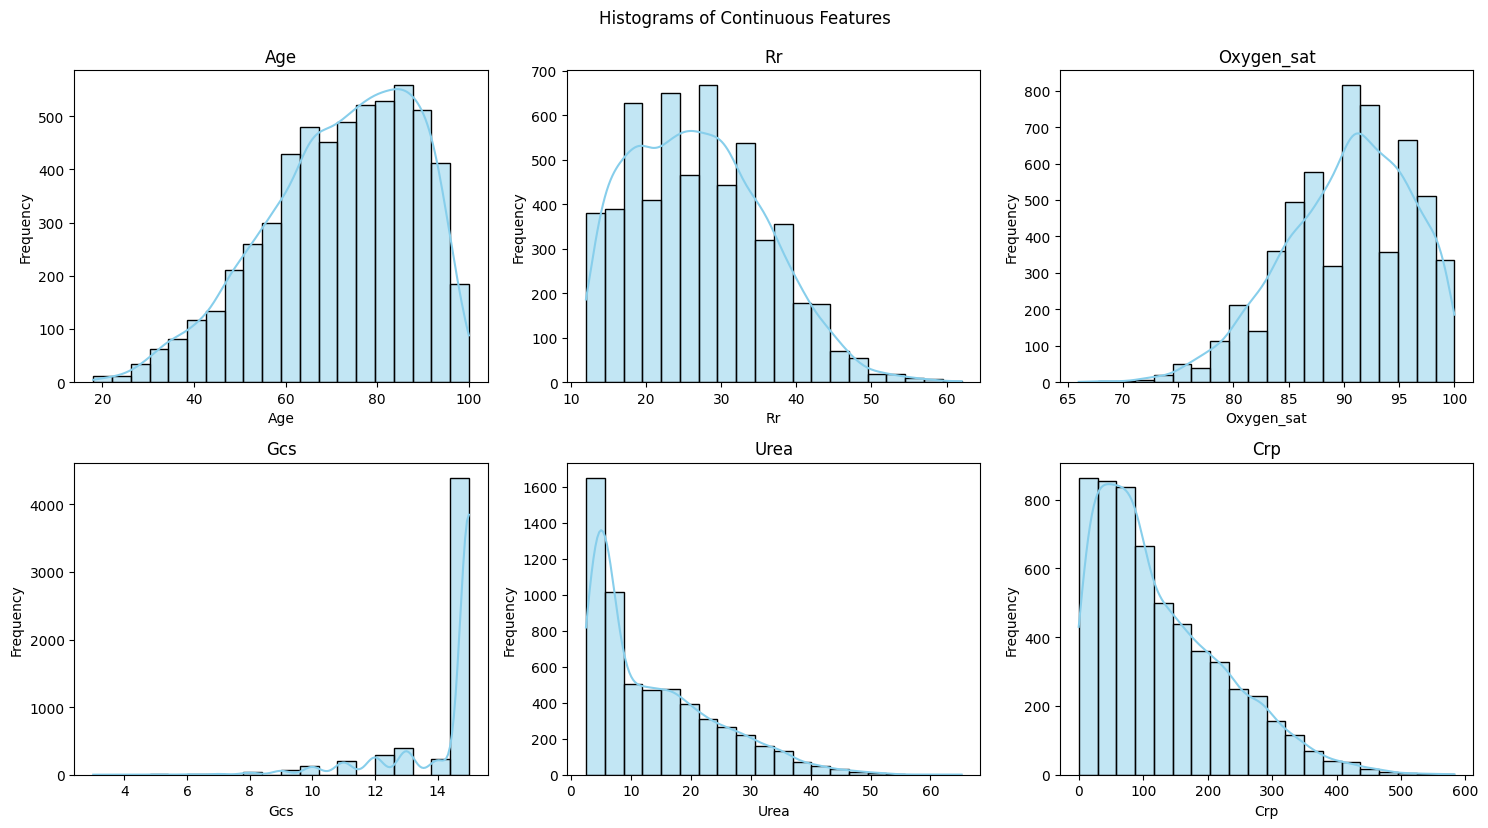


Normality Test:
age: Shapiro p-value = 0.0000 (non-normal)
rr: Shapiro p-value = 0.0000 (non-normal)
oxygen_sat: Shapiro p-value = 0.0000 (non-normal)
gcs: Shapiro p-value = 0.0000 (non-normal)
urea: Shapiro p-value = 0.0000 (non-normal)
crp: Shapiro p-value = 0.0000 (non-normal)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5782.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Histograms for continuous variables
numeric_vars = ['age', 'rr', 'oxygen_sat', 'gcs', 'urea', 'crp']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, var in enumerate(numeric_vars):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[var], bins=20, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{var.capitalize()}')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms of Continuous Features", y=1.03)
plt.show()

# Shapiro-Wilk test for normality
print("\nNormality Test:")
for var in numeric_vars:
    x = df[var].dropna()
    stat, p = shapiro(x)
    print(f"{var}: Shapiro p-value = {p:.4f} {'(normal)' if p > 0.05 else '(non-normal)'}")


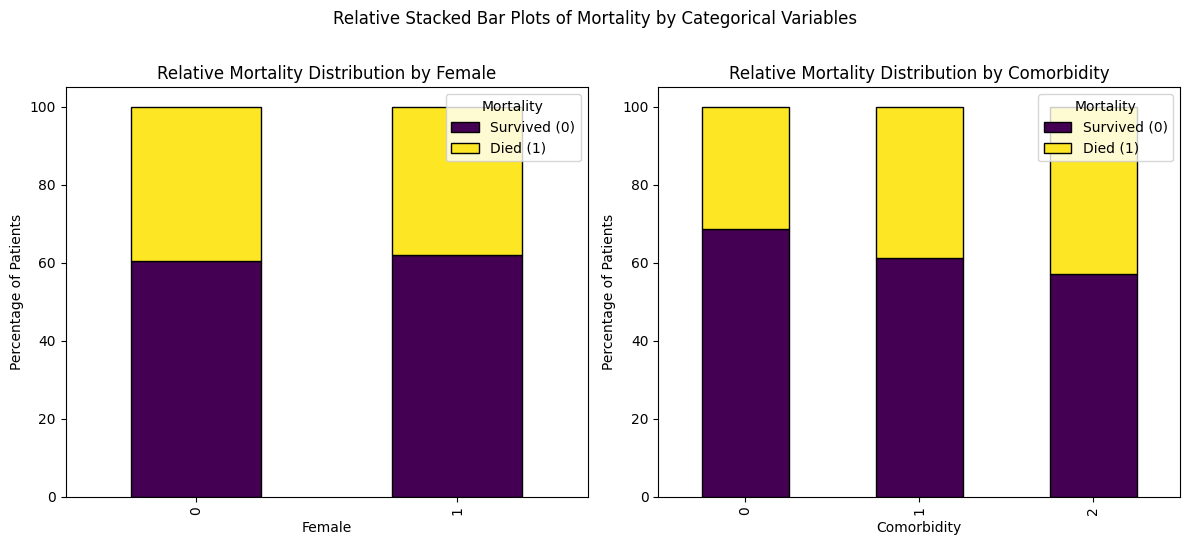


=== Analysis for 'female' ===

Contingency Table (Counts):
mortality     0     1
female               
0          2028  1332
1          1499   923

Proportions within each group:
mortality      0      1
female                 
0          0.604  0.396
1          0.619  0.381

Chi-square Test:
Chi2 = 1.328, p-value = 0.2491, DoF = 1
→ No statistically significant association with mortality.

=== Analysis for 'comorbidity' ===

Contingency Table (Counts):
mortality       0     1
comorbidity            
0             936   425
1             981   621
2            1610  1209

Proportions within each group:
mortality        0      1
comorbidity              
0            0.688  0.312
1            0.612  0.388
2            0.571  0.429

Chi-square Test:
Chi2 = 52.511, p-value = 0.0000, DoF = 2
→ There is a statistically significant association with mortality.


In [ ]:
# Bar plots showing mortality rate by binary variables
categorical_vars = ['female', 'comorbidity']
# Set up subplots
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

# Loop through categorical variables
for i, var in enumerate(categorical_vars):
    # Create a contingency table: counts of mortality by category
    counts = df.groupby([var, 'mortality']).size().unstack(fill_value=0)

    # Normalize to percentages
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot stacked bar chart with relative values
    percentages.plot(kind='bar', stacked=True, ax=axes[i], edgecolor='black', colormap='viridis')

    # Customize plot
    axes[i].set_title(f'Relative Mortality Distribution by {var.capitalize()}')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Percentage of Patients')
    axes[i].legend(title='Mortality', labels=['Survived (0)', 'Died (1)'])

plt.tight_layout()
plt.suptitle("Relative Stacked Bar Plots of Mortality by Categorical Variables", y=1.08)
plt.show()




for var in categorical_vars:
    print(f"\n=== Analysis for '{var}' ===")

    # Contingency table
    contingency = pd.crosstab(df[var], df['mortality'])
    print("\nContingency Table (Counts):")
    print(contingency)

    # Row-wise proportions (i.e., % of 0 vs 1 mortality per group)
    proportions = contingency.div(contingency.sum(axis=1), axis=0)
    print("\nProportions within each group:")
    print(proportions.round(3))

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-square Test:")
    print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}, DoF = {dof}")
    if p < 0.05:
        print("→ There is a statistically significant association with mortality.")
    else:
        print("→ No statistically significant association with mortality.")


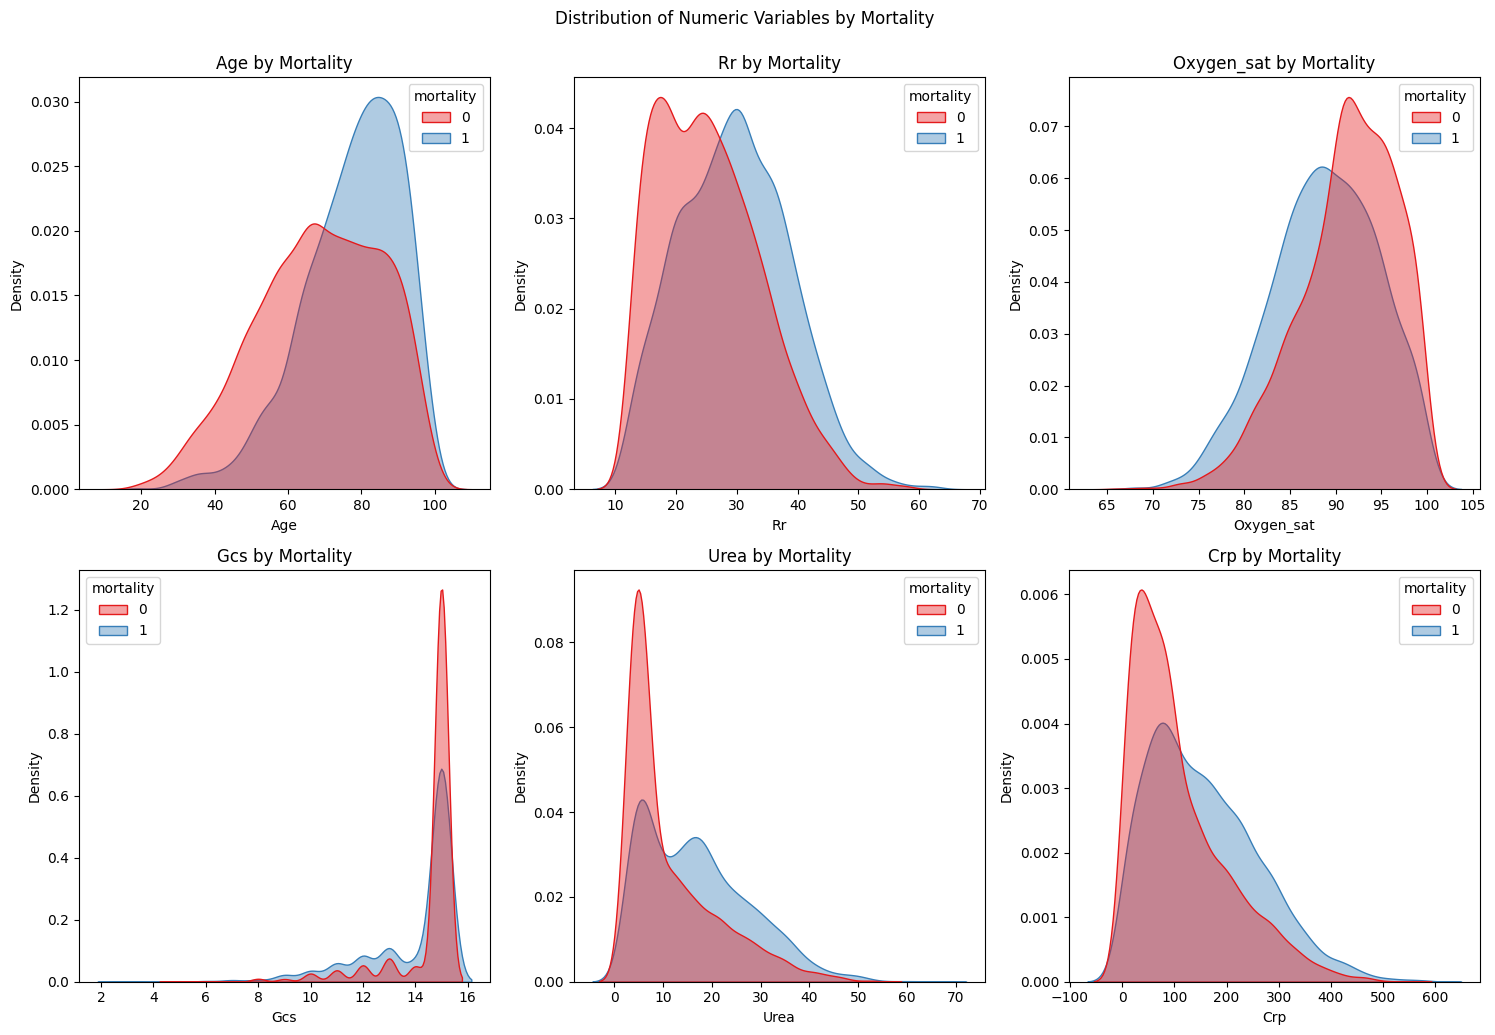


Mann-Whitney U tests between mortality groups:
age: p-value = 0.0000 (different)
rr: p-value = 0.0000 (different)
oxygen_sat: p-value = 0.0000 (different)
gcs: p-value = 0.0000 (different)
urea: p-value = 0.0000 (different)
crp: p-value = 0.0000 (different)


In [ ]:
# KDE plots by mortality
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(numeric_vars):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(data=df, x=var, hue='mortality', common_norm=False, fill=True, alpha=0.4, ax=ax, palette='Set1')
    ax.set_title(f'{var.capitalize()} by Mortality')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Density')

plt.tight_layout()
plt.suptitle("Distribution of Numeric Variables by Mortality", y=1.03)
plt.show()

# Mann-Whitney U tests between mortality groups
print("\nMann-Whitney U tests between mortality groups:")
for var in numeric_vars:
    group0 = df[df['mortality'] == 0][var].dropna()
    group1 = df[df['mortality'] == 1][var].dropna()
    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"{var}: p-value = {p:.4f} {'(different)' if p < 0.05 else '(not different)'}")


Outliers detected based on IQR:
age             16
rr              29
oxygen_sat      34
gcs           1388
urea            82
crp             82
dtype: int64


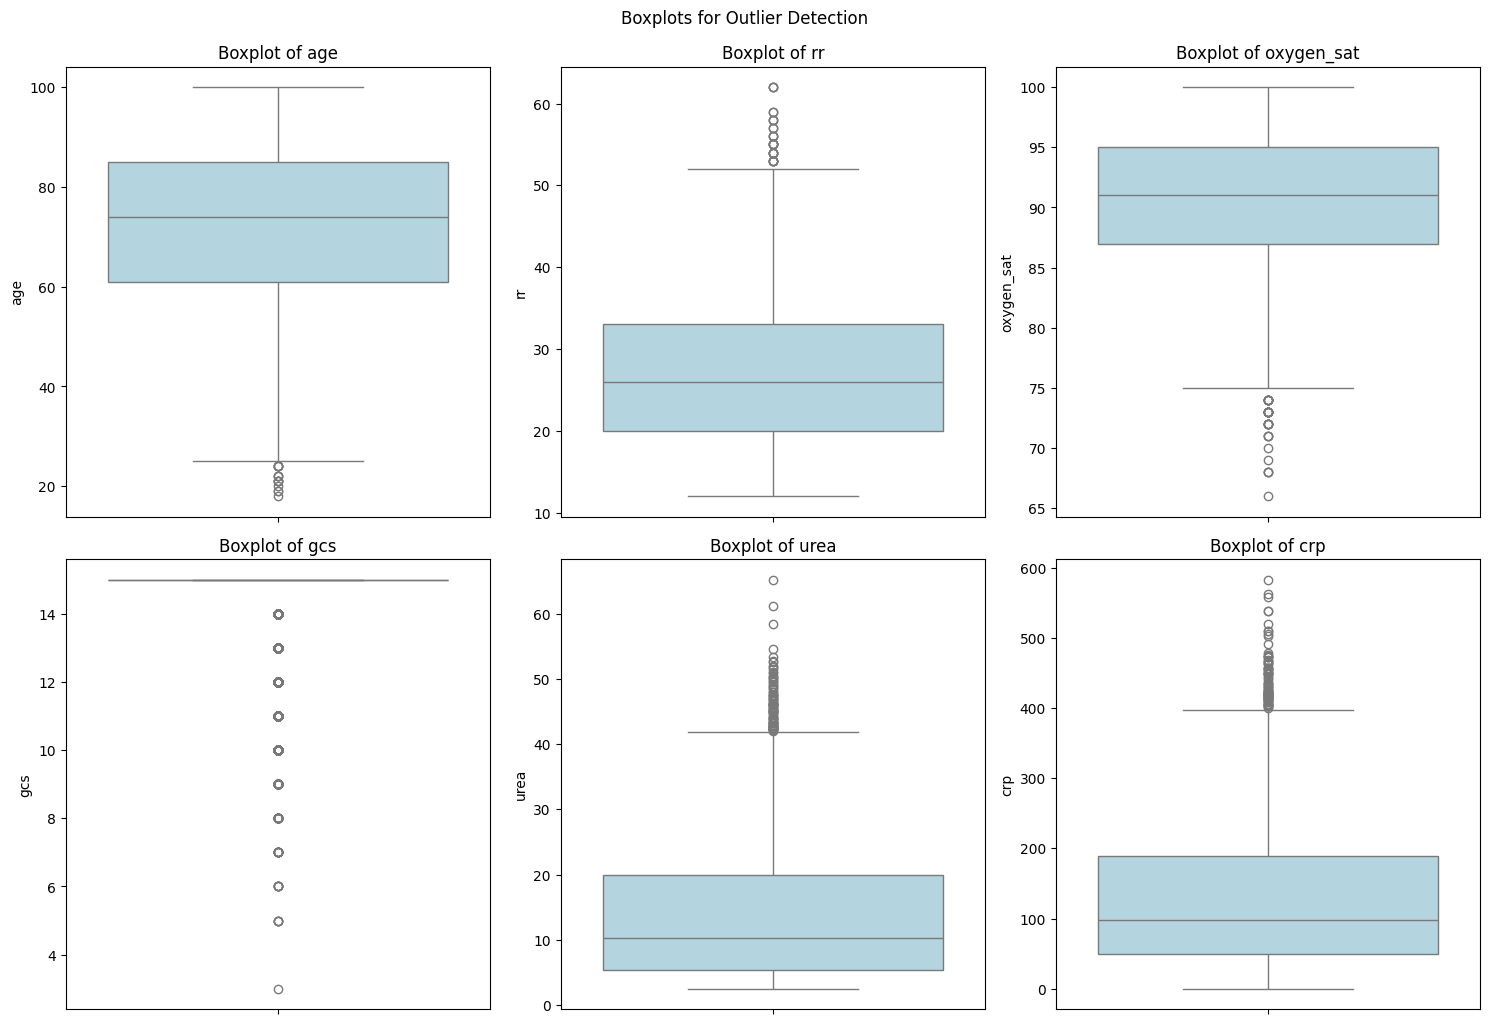

In [ ]:
# Outlier detection using IQR
Q1 = df[numeric_vars].quantile(0.25)
Q3 = df[numeric_vars].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df[numeric_vars] < (Q1 - 1.5 * IQR)) | (df[numeric_vars] > (Q3 + 1.5 * IQR)))
print("Outliers detected based on IQR:")
print(outliers.sum())

# Boxplots for each numeric variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(numeric_vars):
    ax = axes[i // 3, i % 3]
    sns.boxplot(y=df[var], ax=ax, color='lightblue')
    ax.set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.suptitle("Boxplots for Outlier Detection", y=1.02)
plt.show()





#Preprocessing

In [ ]:
# Remove outliers
df_cleaned = df.copy()

numeric_vars_excluding_gcs = [var for var in numeric_vars if var != 'gcs']

for var in numeric_vars_excluding_gcs:
    z_scores = zscore(df_cleaned[var].dropna())
    outlier_indices = df_cleaned[var][(np.abs(z_scores) > 3)].index
    df_cleaned = df_cleaned.drop(index=outlier_indices)

print(f"\nShape after removing outliers: {df_cleaned.shape}")




Shape after removing outliers: (5626, 11)


In [ ]:


# Ensure correct data types for binary variables
df_cleaned['female'] = df_cleaned['female'].astype(int)
df_cleaned['comorbidity'] = df_cleaned['comorbidity'].astype(int)
df_cleaned['mortality'] = df_cleaned['mortality'].astype(int)

# Split into development and validation sets
dev = df_cleaned[df_cleaned["set"] == "dev"].copy()
val = df_cleaned[df_cleaned["set"] == "val"].copy()

# Define predictors and outcome
X_dev = dev[['age', 'female', 'comorbidity', 'rr', 'oxygen_sat', 'gcs', 'urea', 'crp']]
y_dev = dev['mortality']
X_val = val[['age', 'female', 'comorbidity', 'rr', 'oxygen_sat', 'gcs', 'urea', 'crp']]
y_val = val['mortality']


#Logistic regression model development and validation

In [ ]:
# Fit logistic regression using statsmodels
X_dev_sm = sm.add_constant(X_dev)
logit_model = sm.Logit(y_dev, X_dev_sm).fit()
print(logit_model.summary())

print(f"\nAIC: {logit_model.aic:.2f}")
print(f"BIC: {logit_model.bic:.2f}")



Optimization terminated successfully.
         Current function value: 0.548684
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              mortality   No. Observations:                 3446
Model:                          Logit   Df Residuals:                     3437
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.1742
Time:                        22:40:19   Log-Likelihood:                -1890.8
converged:                       True   LL-Null:                       -2289.6
Covariance Type:            nonrobust   LLR p-value:                6.570e-167
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2642      0.816      0.324      0.746      -1.334       1.863
age             0.0465    

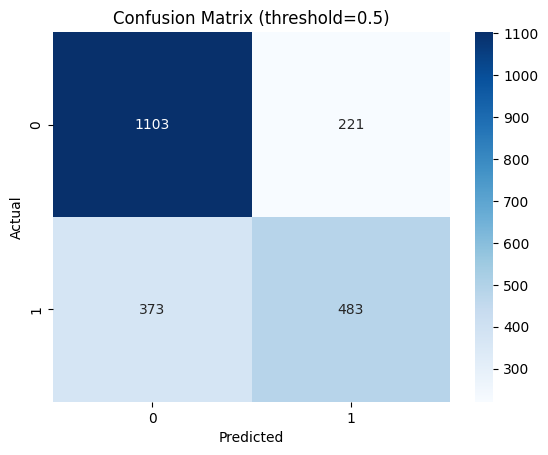

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1324
           1       0.69      0.56      0.62       856

    accuracy                           0.73      2180
   macro avg       0.72      0.70      0.70      2180
weighted avg       0.72      0.73      0.72      2180



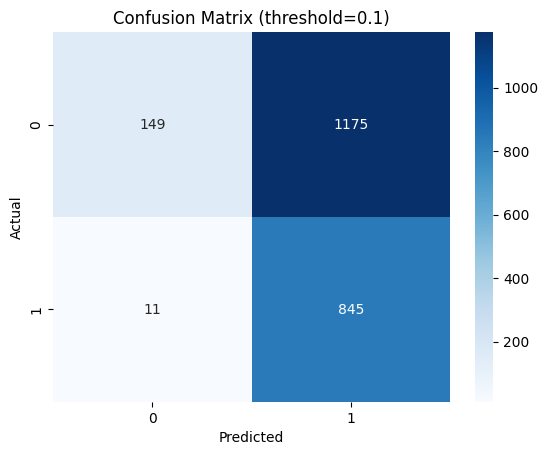

              precision    recall  f1-score   support

           0       0.93      0.11      0.20      1324
           1       0.42      0.99      0.59       856

    accuracy                           0.46      2180
   macro avg       0.67      0.55      0.39      2180
weighted avg       0.73      0.46      0.35      2180



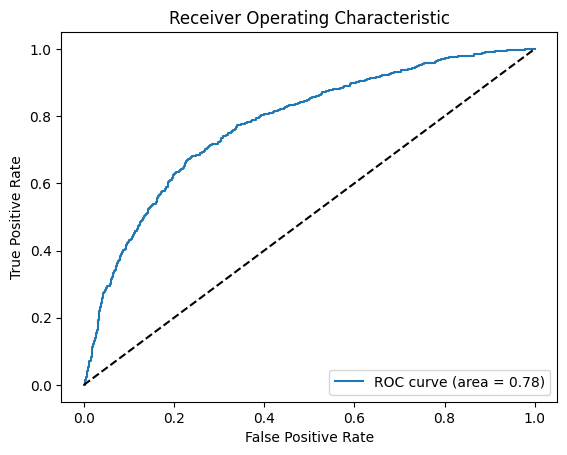

In [ ]:
# Predict probabilities on validation set
X_val_sm = sm.add_constant(X_val)
val.loc[:, 'pred'] = logit_model.predict(X_val_sm)

##Results for threshold = 0.5

# Confusion matrix
y_pred = (val['pred'] > 0.50).astype(int)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (threshold=0.5)')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

##Results for threshold = 0.5

# Confusion matrix
y_pred = (val['pred'] > 0.10).astype(int)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (threshold=0.1)')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

# ROC curve
auc = roc_auc_score(y_val, val['pred'])
fpr, tpr, thresholds = roc_curve(y_val, val['pred'])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Decision Curve Analysis (DCA)

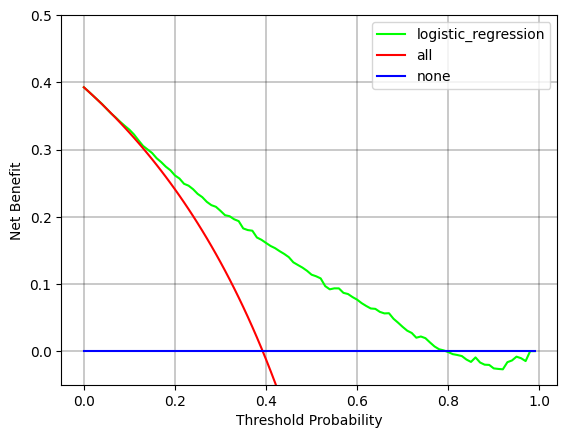

In [ ]:
# Decision curve using predicted probabilities
val_dca = val.copy()
val_dca['logistic_regression'] = val['pred']

dca_results = dca(
    data=val_dca,
    outcome='mortality',
    modelnames=['logistic_regression']
)

plot_graphs(
    plot_df=dca_results,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.5]
)


#Expected Value of Perfect Information (EVPI)

In [ ]:
from sklearn.utils import resample

pt=0.10

# Define the number of bootstrap iterations
n_iterations = 1000
bootstrap_evpi = []

# Use validation dataset (val) for bootstrapping
for _ in range(n_iterations):
    # Bootstrap resample from the validation dataset
    boot_sample = resample(val)  # use val dataset here

    # Train model (logistic regression)
    X = boot_sample[['age', 'female', 'comorbidity', 'rr', 'oxygen_sat', 'gcs', 'urea', 'crp']]
    y = boot_sample['mortality']

    # Get predicted probabilities
    boot_sample['pred'] = logit_model.predict(sm.add_constant(X))

    # Calculate the net benefit of the resampled model at the threshold
    nb_model_boot = dca_results[(dca_results['threshold'] == pt) &
                                (dca_results['model'] == 'logistic_regression')]['net_benefit'].values[0]

    # Calculate the net benefit of the perfect model at the threshold
    nb_perfect_boot = dca_results[(dca_results['threshold'] == pt) &
                                  (dca_results['model'] == 'all')]['net_benefit'].values[0]

    # Compute EVPI for this bootstrap sample
    evpi_boot = nb_perfect_boot - nb_model_boot
    bootstrap_evpi.append(evpi_boot)

# Calculate the mean and 95% confidence interval of EVPI from bootstrap samples
evpi_mean = np.mean(bootstrap_evpi)
evpi_ci = np.percentile(bootstrap_evpi, [2.5, 97.5])

print(f"Bootstrap-based EVPI: {evpi_mean:.2f}")
print(f"95% CI: {evpi_ci}")


Bootstrap-based EVPI: -0.00
95% CI: [-0.00438328 -0.00438328]


# Discussion

At the clinically relevant threshold of 0.10 (ICU admission risk cutoff), the model achieves:

* High sensitivity (recall = 0.99) for high-risk patients, which is valuable for not missing severe cases.

* Very low precision (0.42) and overall low accuracy (0.46) indicate a high false positive rate, risking unnecessary ICU admissions.

* EVPI = 0.00, suggesting limited added value from further model refinement under current conditions.

In contrast, at a 0.50 threshold, performance is more balanced (accuracy = 0.73, AUC = 0.78), but this is less clinically relevant for early ICU triage.

## Recommendation

While the model shows good discrimination and performs well overall, its low precision at the decision threshold and UK-specific development call for external validation in Dutch hospitals. Differences in admission practices, resource availability, and patient profiles may affect real-world performance.

## Conclusion:
The model can support early ICU decision-making, but external validation is essential before deployment in the Netherlands to ensure safe, effective use.